In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib widget


First step: load measurements and visualize it
========

In [9]:
noisy = True  # False for no noise (cool for debug)
if noisy:
    measurements = np.load("measurements.npy")
else:
    measurements = np.load("measurements_without_noise.npy")

# Time: 
t = np.arange(0,80+.1,0.1) # timestamps start from 0 and go to 80s, at 10Hz


`measurements`contains all the measurements for each landmarks according to the time. It is a matrix with the following structure:
  - Each column contains the measurement of all the landmarks of the scene at a specific timestamps
  - If a landmarks is **not seen** at a specific time, its value will be `NaN`
  - The measurements represents the coordinates of the landmark in the robot frame
  - **The noisy version is affected by a Gaussian noise of standard deviation $\sigma_R = 0.2m$**

Thus, `measurements` has the following structure:
$$
\begin{bmatrix}
  x_0(t=0) & x_0(t=0.1) & \dots & x_0(t=80) \\
  y_0(t=0) & y_0(t=0.1) & \dots & y_0(t=80) \\
  x_1(t=0) & x_1(t=0.1) & \dots & x_1(t=80) \\
  y_1(t=0) & y_1(t=0.1) & \dots & y_1(t=80) \\
  \vdots & \vdots & \ddots & \vdots \\  
  x_{N-1}(t=0) & x_{N-1}(t=0.1) & \dots & x_{N-1}(t=80) \\
  y_{N-1}(t=0) & y_{N-1}(t=0.1) & \dots & y_{N-1}(t=80) \\
\end{bmatrix}
$$


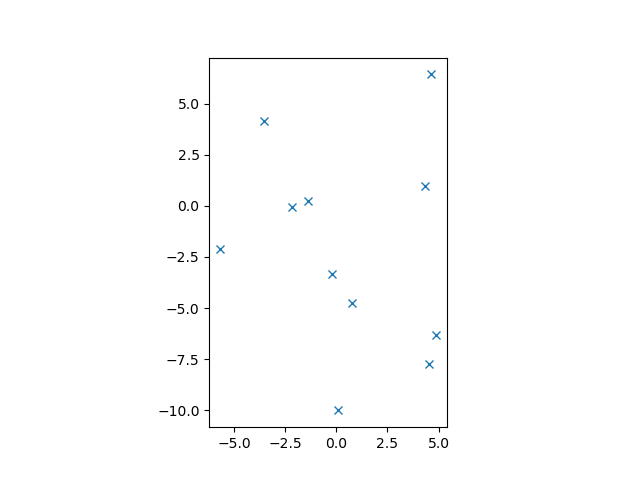

In [10]:
# Animation of the measurements

fig, ax = plt.subplots()
pts = ax.plot(measurements[0::2,0],measurements[1::2,0],'x')[0]
ax.set_aspect(1)
j=0
def update(frame):
    global j
    j = j+1
    pts.set_xdata(measurements[0::2,j])
    pts.set_ydata(measurements[1::2,j])
    return (pts)


ani = animation.FuncAnimation(fig=fig, func=update, frames=len(t)-2, interval=100,repeat=False)
plt.show()

In [11]:
# Find the number of landmarks
N = ... 

# Kalman state

The state we are going to use for the Kalman filter is:
$$
X_k = \begin{bmatrix}
x_k \\ y_k\\ \theta_k\\ x_{(0)}\\ y_{(0)}\\ \vdots\\ x_{(N)}\\ y_{(N)}]
\end{bmatrix}
$$
where the subscripts with parenthesis denotes the landmark number.

Motion model
==========

We are going to use a classical non holonomic motion model for the robot, which will be paremeterized by its 2D coordinates and orientation $(x_k,y_k,\theta_k)$. Let us assume that a linear velocity $V_k$ and an angular velocity $\omega_k$ drive the robot between timesteps $k$ and $k+1$. We have:
$$
\left\{
    \begin{array}{rcl}
    x_{k+1} & = & x_k + V_k\delta t\cos\theta_k \\
    y_{k+1} & = & y_k + V_k\delta t\sin\theta_k\\
    \theta_{k+1} & = & \theta_k + \omega_k\delta t
    \end{array}
\right.
$$

For the Kalman implementation, we will consider that $V_k$ and $\omega_k$ are unknown and need to be estimated. Then, we will assume that these values do not move a lot between two time steps. In the simulation, we have:
$$
\begin{array}{rcl}
  v_{k+1} & \approx & v_k \\
  \omega_{k+1} & \approx & \omega_k
\end{array}

$$
and
$$
  \begin{array}{l}
    |v_{k+1}-v_k| \leq 0.1 \\
    |\omega_{k+1}-\omega| \leq 0.38
  \end{array}
$$
This should give you a way to set up the order of magnitudes of the variables 



**Can you write two `Python` functions `f`and `F` that computes that return the model prediction $f(X_k)$ and its Jacobian $F=\partial f / \partial X$?**

In [12]:
def f(X):
    pass
    #returns the predictuin

def F(X):
    pass
    #returns the Jacobian matrix of the model


Measurement model
====

The masurements represent the **position of the landmarks in the robot frame**. Can you give the expression of the $h$ function and its Jacobian $\partial h / \partial X$ in the case of a unique landmark? At this step, it is not recommanded to implement these functions in Python

The Kalman filter
=========

**Now the competition starts!** It is time to write a Kalman filter that will compute the robot position and the map at each time step. When the algorithm has finished, plot the final map with the trajectory on the same figure. Then, plot the computed $V$ and $\omega$ on two different figures. Here are some advices:
  - The initial values of $X$ should not be random! In particular, some landmarks are already seen at the very initial time step. This information has to be used
  - The initial covaraice matrix $P$ should not be set up randomly. There are several information to use, e.g.:
    - The initial pose is set up at 0 by convention, and it is supposed to be perfectly known
    - The initial velocities are not known
    - Some landamrks might be known (the one seen at the very initial stage) and some other not (the ones we see after).
  - Make sure about the dimension of the vector and matrices! 
  - The tricky part is the presence of `NaN` values in the `measurements` matrix. It means you will have to extract the subset of the landmakrs that are seen at each time step. Be careful with that!